In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dropout,Flatten,Dense,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.preprocessing.image import 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os,cv2
import tensorflow as tf


Downloading the Dataset.

In [2]:
_URL = 'http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz'
zip_dir = tf.keras.utils.get_file('/content/logo', origin=_URL, untar=True,extract=True)

101834752/101827904 [==============================] - 7s 0us/step


In [4]:
fname = '/content/flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [5]:
src_dir = "flickr_logos_27_dataset_images"
dest = "LOGOS"
if not os.path.exists(dest):
    os.makedirs(dest)

In [7]:
df = pd.read_csv("/content/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)
df.head(5)

Taking the coordiinates of the logo in the annotation text file

In [9]:
dtdir = '/content/flickr_logos_27_dataset_images/'
size = df.iloc[:,3:]
img = os.path.join(dtdir,im)
size = size.values.tolist()
size[0][0],size[0][1],size[0][2],size[0][3]

In [ ]:
Mapping the dataset with teh class label and the coordinates of the position of logo

In [18]:
X = df.iloc[:,0]
Y = df.iloc[:,1]
y = list(set(list(Y)))
y.sort()
for i in y:
    os.makedirs(os.path.join(dest,i))
for i in range(len(X)): 
    try:
        label = os.path.join(dest,Y[i])
        finalpath = os.path.join(label,X[i])
        img  = os.path.join(dtdir,X[i])
        image = cv2.imread(img)
        image = image[size[i][1]:size[i][3],size[i][0]:size[i][2]]
        image = cv2.resize(image,(224,224))
        cv2.imwrite(finalpath,image)
    except:
        pass

In [ ]:
Augmentation of the dataset due to less number of data points

In [29]:
train = ImageDataGenerator(
rescale = 1/255,horizontal_flip=True,
vertical_flip=True,shear_range=0.2,zoom_range=0.2,featurewise_center=True, # Set input mean to 0 over the dataset, feature-wise
featurewise_std_normalization=True, # Divide inputs by std of the dataset, feature-wise
rotation_range=40, # Degree range for random rotations
width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',validation_split=0.1)

In [98]:
HEIGHT,WIDTH= (224,224)
INIT_LR = 1e-3
EPOCHS = 50 
BS = 64
trainset = train.flow_from_directory(dest,target_size = (WIDTH,HEIGHT),batch_size = BS,shuffle=False,seed=42,color_mode='rgb',class_mode='categorical')
validset = train.flow_from_directory(dest,target_size = (WIDTH,HEIGHT),batch_size = BS,shuffle=False,seed=42,color_mode='rgb',class_mode='categorical',subset = 'validation')
imagePaths = list(paths.list_images(dest))

Found 809 images belonging to 27 classes.
Found 80 images belonging to 27 classes.


In [100]:

mobilemodel = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(WIDTH, HEIGHT, 3)))
model = mobilemodel.output
model= AveragePooling2D(pool_size=(7, 7))(model)
model=Flatten(name="flatten")(model)
model=Dense(128, activation="relu")(model)
model=Dropout(0.5)(model)
model=Dense(trainset.num_classes, activation="softmax")(model)
model = Model(inputs=mobilemodel.input, outputs=model)
for layer in mobilemodel.layers:
	layer.trainable = False

print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum = 0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


[INFO] compiling model...


In [81]:
H = model.fit_generator(trainset,validation_data = validset,epochs=EPOCHS)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
13/13 [==============================] - 10s 754ms/step - loss: 4.0303 - accuracy: 0.0494 - val_loss: 3.2820 - val_accuracy: 0.1250
Epoch 2/50
13/13 [==============================] - 9s 677ms/step - loss: 3.5974 - accuracy: 0.0334 - val_loss: 2.9624 - val_accuracy: 0.1750
Epoch 3/50
13/13 [==============================] - 9s 661ms/step - loss: 3.2230 - accuracy: 0.0841 - val_loss: 2.8904 - val_accuracy: 0.2500
Epoch 4/50
13/13 [==============================] - 9s 662ms/step - loss: 2.9959 - accuracy: 0.1582 - val_loss: 2.7697 - val_accuracy: 0.3250
Epoch 5/50
13/13 [==============================] - 9s 662ms/step - loss: 2.8896 - accuracy: 0.1854 - val_loss: 2.5875 - val_accuracy: 0.3875
Epoch 6/50
13/13 [==============================] - 9s 669ms/step - loss: 2.8054 - accuracy: 0.2225 - val_loss: 2.4283 - val_accuracy: 0.4625
Epoch 7/50
13/13 [==============================] - 9s 677ms/step - loss: 2.6758 - accuracy: 0.2633 - val_loss: 2.3563 - val_accuracy: 0.4750
Epoch

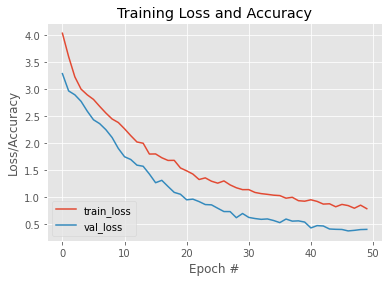

In [82]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="top right")
plt.show()

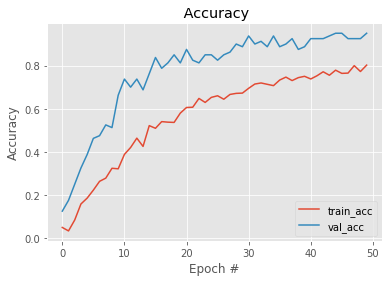

In [85]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title(" Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

In [87]:

print("[INFO] evaluating after fine-tuning network...")
validset.reset()
predIdxs = model.predict(x=validset)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(validset.classes, predIdxs,
	target_names=validset.class_indices.keys()))


[INFO] evaluating after fine-tuning network...


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


              precision    recall  f1-score   support

      Adidas       1.00      1.00      1.00         3
       Apple       1.00      1.00      1.00         3
         BMW       1.00      1.00      1.00         3
     Citroen       1.00      1.00      1.00         3
    Cocacola       1.00      1.00      1.00         3
         DHL       1.00      1.00      1.00         3
       Fedex       1.00      1.00      1.00         3
     Ferrari       1.00      1.00      1.00         3
        Ford       1.00      0.33      0.50         3
      Google       1.00      1.00      1.00         3
          HP       1.00      1.00      1.00         3
    Heineken       1.00      0.67      0.80         3
       Intel       1.00      1.00      1.00         3
   McDonalds       1.00      1.00      1.00         3
        Mini       1.00      1.00      1.00         3
         Nbc       1.00      1.00      1.00         3
        Nike       1.00      1.00      1.00         3
       Pepsi       1.00    

In [90]:
model.save('final.h5', save_format="h5")